<a href="https://colab.research.google.com/github/Inafamoo/Studi-Independem/blob/main/Inafamo_Customer_Churn_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STUDI KASUS**

Terdapat dataset konsumen dengan **2 kategori churn**, yaitu **pelanggan aktif (0) dan pelanggan yang sudah berhenti (1)**



---



**KLASIFIKASI KONSUMEN**

**Memanggil Library**

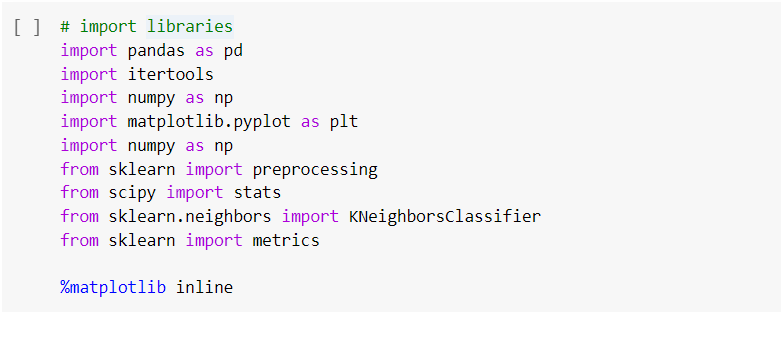

In [1]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline

**Load Dataset**

sumber dataset : http://buku.dioskurn.com/buku1/ch9

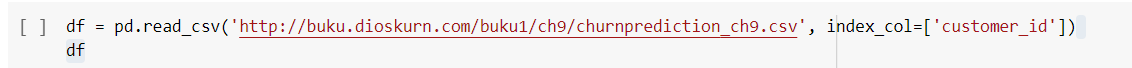

In [2]:
df = pd.read_csv('http://buku.dioskurn.com/buku1/ch9/churnprediction_ch9.csv', index_col=['customer_id'])

In [3]:
df.head()

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


In [4]:
df.info

<bound method DataFrame.info of                                   product  reload_1  reload_2    video  \
customer_id                                                              
285fae8412c4720a0c79d95f98434422  Kartu A  27734.30  24381.32  22000.0   
f45bce87ca6bf100f222fcc0db06b624  Kartu A  26433.00  26515.50      0.0   
09b54557b1e2a10d998e3473a9ccd2a0  Kartu A  93212.17  67101.83      0.0   
11f252f48be36f93dd429f2ec86cb2f5  Kartu A    183.33   1087.17      0.0   
a8df29ae9195eea348d2f74c967b978d  Kartu A  95296.67  76246.50      0.0   
...                                   ...       ...       ...      ...   
9e8b318d96caa9c0c4a50e8e59f5026c  Kartu B   1634.33  12085.33      0.0   
a310627191bdbded3905ac73e77fe319  Kartu B  30000.33  45170.67      0.0   
b6f11059e5c1df69b8c16d5c39af23dc  Kartu B   3333.33  13338.67      0.0   
88709f1defd232243f729912be696f87  Kartu B  25000.00  33333.33      0.0   
2c5bc32bc9a9c393d393bfc11c409b0d  Kartu C      0.00  11084.00      0.0   

     

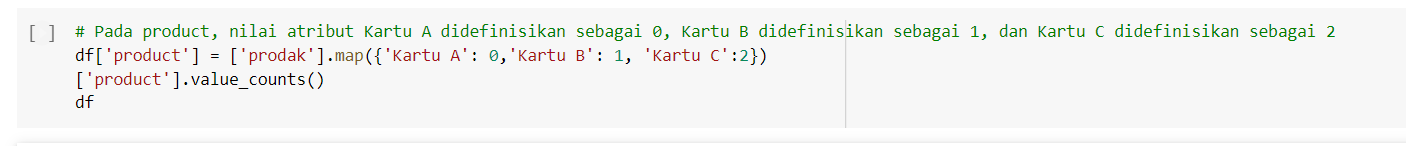

In [5]:
df['product'] = df['product'].map({'Kartu A': 0, 'Kartu B': 1, 'Kartu C': 2})
df['product'].value_counts()


2    7548
1    1679
0     773
Name: product, dtype: int64

**Feature set**

Selanjutnya, kita format dataset, yaitu bentuk feature sets (kumpulan atribut), kita bentuk variabel X dan Y
Untuk menggunakan library scikit-learn library, kita harus convert format data frame-nya Panda, ke array Numpy :

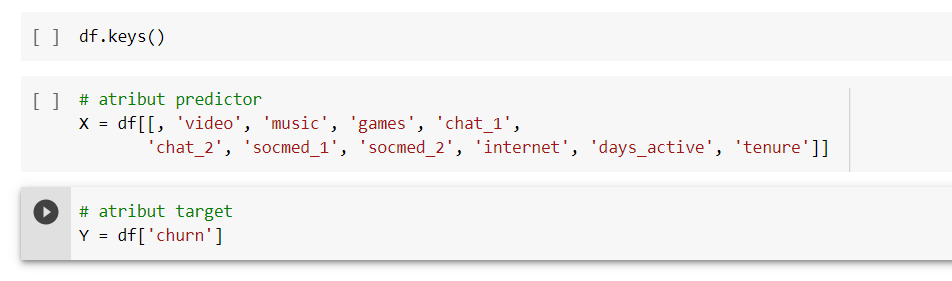

In [6]:
df.keys()

Index(['product', 'reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure',
       'churn'],
      dtype='object')

In [7]:
X =df[['product', 'reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure',
       'churn']]

In [8]:
Y =df['churn']

**Normalisasi Data**

K-NN merupakan metode yang didasarkan pada tingkat kedekatan antar-atribut. Oleh karena itu, sangat disarankan untuk melakukan normalisasi data agar perhitungan jarak menjadi lebih valid.

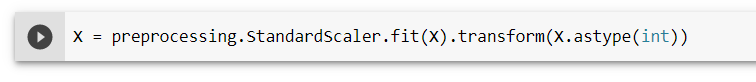

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(int))

**Pembagian Data Training dan Testing**

Untuk menghasilkan model yang baik, perlu dilakukan pengujian yang baik. Aturan umum yang berlaku adalah data training dan testing harus dipisahkan terlebih dahulu. Dengan kata lain tidak boleh menggunakan data yang sama untuk training dan testing. Kali ini kita membagi dataset dengan komposisi **sebesar 80% data training dan 20% data testing.**

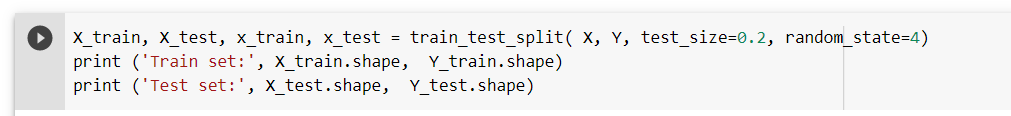

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print ('train set :' , X_train.shape, Y_train.shape)
print ('test set :' , X_test.shape, Y_test.shape)

train set : (8000, 14) (8000,)
test set : (2000, 14) (2000,)


**Klasifikasi K-nearest neighbor (K-NN)**

**Training**

Pertama, tentukan nilai k. Kita akan coba dengan nikai k=7:

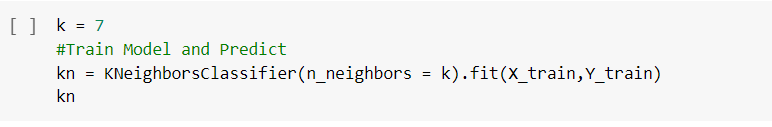

In [11]:
k = 7 
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
knn

KNeighborsClassifier(n_neighbors=7)

**Predicting**

Kita sudah dapat menggunakan **model** yang terbentuk **untuk memprediksikan data**

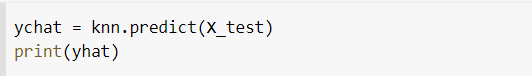

In [12]:
ychat = knn.predict(X_test)
print(ychat)

[0 1 0 ... 1 0 0]


**Perhitungan Akurasi**

Pada klasifikasi, **nilai akurasi klasifikasi** secara sederhana dapat dihitung dengan memperbandingkan kelas **hasil prediksi algoritma** dengan kelas sebenarnya / actual class.

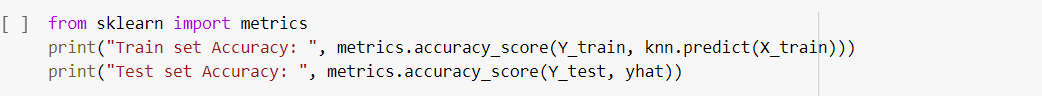

In [13]:
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, knn.predict(X_train)))
print("Test Set Accuracy : ", metrics.accuracy_score(Y_test, ychat))

Train set Accuracy:  0.999625
Test Set Accuracy :  1.0


**MENCARI NILAI TERBAIK**

Performa dari model** K-NN sangat bergantung dengan nilai K**. Lalu bagaimana memilih nilai K yang terbaik? Jawabnya, kita harus lakukan pengujian.

Kode berikut ini bertujuan untuk melakukan pengujian nilai k dari **k=1 s.d k=10.**

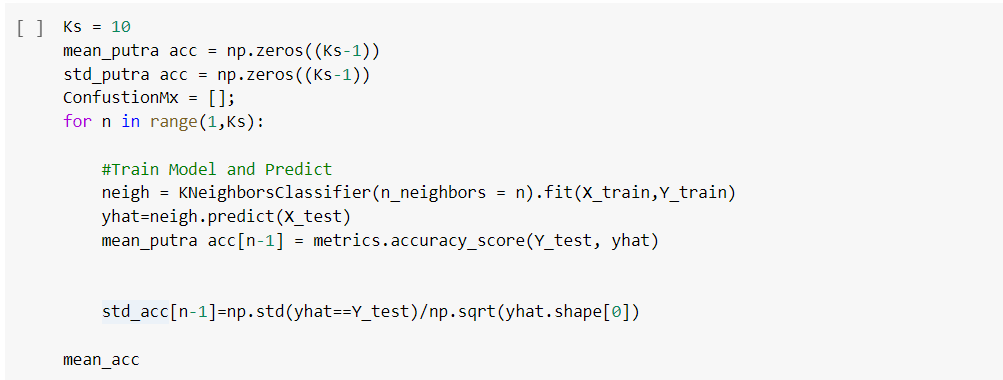

In [14]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.    , 0.9995, 1.    , 1.    , 1.    , 1.    , 1.    , 0.9995,
       1.    ])

**Lalu kita juga bisa menampilkan grafik / plot-nya untuk mempermudah pembacaan data maka dilakukan visualisasikan**

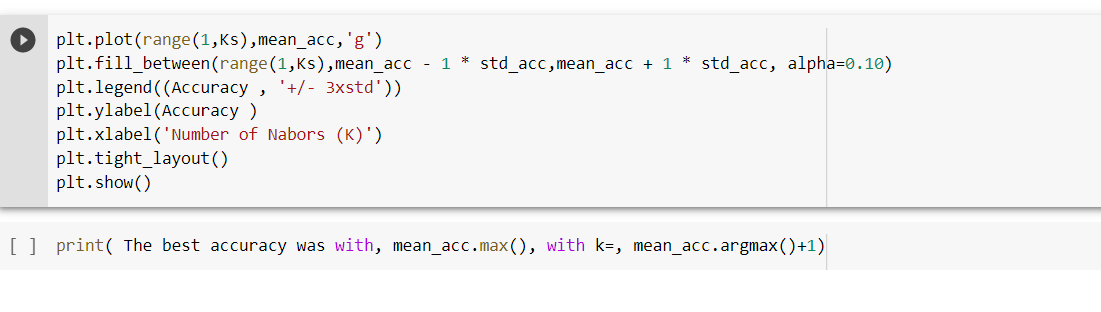

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

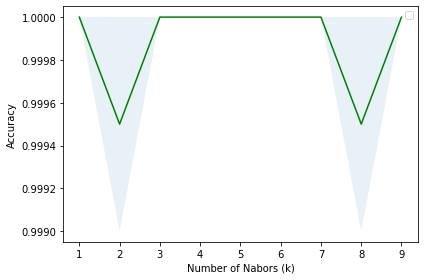

In [15]:
plt.plot(range(1,Ks),mean_acc, 'g')
plt.fill_between(range(1,Ks),mean_acc -1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.legend('Accuracy', '+/- 3xsrd')
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (k)')
plt.tight_layout()
plt.show()